# Projekt 1

Celem tego projektu jest znalezienie jak najlepszego rozwiązania gry / puzzli CORRAL lub inaczej nazywane CAVE - puzzle za pomocą algorytmu genetycznego. Cel gry jest bardzo prosty jest nim narysowanie pojedynczej zamkniętej pętli wzdłuż linii siatki, która się nie przecina. Pętla musi obejmować wszystkie liczby. Liczby w siatce wskazują, ile komórek wewnątrz pętli można zawrzeć poziomo i pionowo, włączając samą komórkę. W projekcie porównywane będą czasy działania na danych o różnej wielkości.

# Algorytm genetyczny

In [5]:
# Importujemy wszytskie potrzebne nam biblioteki
import numpy as np
import random
import time
import pygad
import math

In [ ]:
# Tworzymy funkcje pomocnicze dla fitness
def array_to_matrix(arr):
    n = int(math.sqrt(len(arr)))
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = arr[i*n+j]
    return matrix

def count_orthogonal(matrix, i, j):
    count = 0
    # Check left
    for col in range(j-1, -1, -1):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check right
    for col in range(j+1, len(matrix[0])):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check up
    for row in range(i-1, -1, -1):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    # Check down
    for row in range(i+1, len(matrix)):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    return count + 1 

def check_neighbors(matrix, i, j):
    # Check the neighbors of the given index (i, j)
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] != 1:
            return False
    return True

def check_ones(matrix, i, j):
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] == 1:
            return True
    return False

# Małe macierze 

Na początku badamy algorytm na małych macierzach 4x4 bądź 5x5.
Gene_space składa się z 0 i 1 reprezentujących odpowiednio puste i zamalowane/będące w pętli pola. 
Liczba genów jest równa ilości pól w macierzy czyli 16 lub 25.
Elementów jest mało, przez co algorytm bardzo dobrze sobie z nim radzi i nie widać dużych różnic przy zmianie parametrów funkcji pygad.GA.

In [ ]:
siec_small_1 = np.array([[3,0,0,0],
                         [0,0,4,0],
                         [0,6,0,5],
                         [2,0,0,0]])

siec_small_2 = np.array([[0, 5, 3, 0, 0],
                         [0, 0, 0, 0, 3],
                         [9, 0, 0, 0, 7],
                         [5, 0, 0, 0, 0],
                         [0, 0, 4, 2, 0]])

siec_small_3 = np.array([[2, 0, 0, 3, 0],
                        [0, 0, 7, 0, 0],
                        [0, 0, 0, 0, 0],
                        [0, 5, 0, 0, 4],
                        [0, 0, 2, 0, 0]])

siec_small_4 = np.array([[0,3,3,0,0],
                         [0,0,0,0,3],
                         [9,0,0,0,7],
                         [5,0,0,0,0],
                         [0,0,4,2,0]])

Funckja fitness wygląda tak:

In [ ]:
def fitness_func(solution, solution_idx):
    solArr = array_to_matrix(solution)
    spr = 0 
    for x in range(len(siec)):
        for y in range(len(siec)):
            if (solArr[x][y] == 0):
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                    if check_neighbors(solArr, x, y):
                        spr+=1
            else:
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                      if not check_ones(solArr, x, y):
                            spr+=1
            if siec[x][y] != 0:
                if (solArr[x][y] == 0):
                    spr+=1
                a = siec[x][y]
                b = count_orthogonal(solArr, x, y)
                spr += abs(a-b)

    fitness = -spr
    return fitness

Działanie funkcji polega na iteracji po elementach macierzy.
W przypadku napotkania liczby równej 0 w rozwiązaniu, sprawdzamy czy nie jest to zamknięta pętla niezamalowanych kratek w takim przypadku przyznajemy punkt karny.
Gdy napotkamy liczbę różną od zera w naszej macierzy sprawdzamy czy jej miejsce w rozwiązaniu jest 0, jeśli tak to także są dodawane punkty karne oraz korzystając z funckji pomocniczej count_orthogonal zdefiniowanej wyżej zliczamy jedynki wzdłuż i wszerz. Po zliczeniu przyznawane są punkty karne w ilości wartości bezwzględnej (wartość liczby - wystąpienia "1").

Ilość chromosomów ustawimy na 200. Rodziców do rozmnażania wyłaniamy 100(50 % populacji). Liczba pokoleń: 40. 
Przebieg rozwiązania wraz z rezultatem:

Wynik dla pierwszej macierzy ( siec_small_1 )

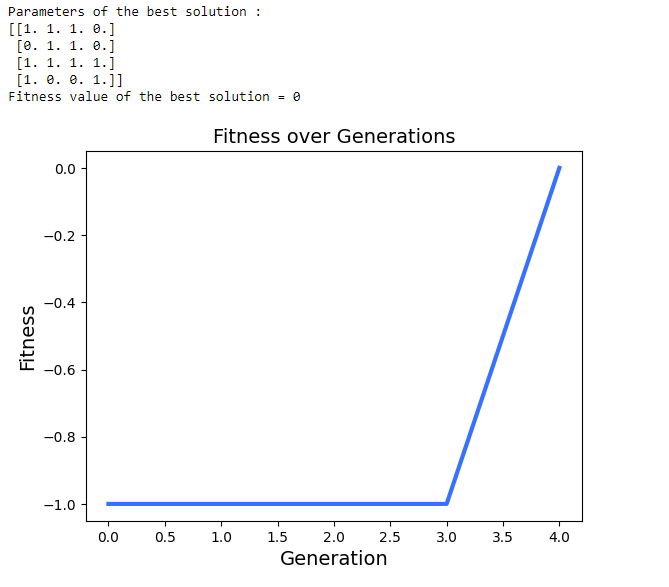

Tutaj zaprezentowane jak wygląda to rozwiązanie na prawdziwej siatce nie zero - jedynkami :

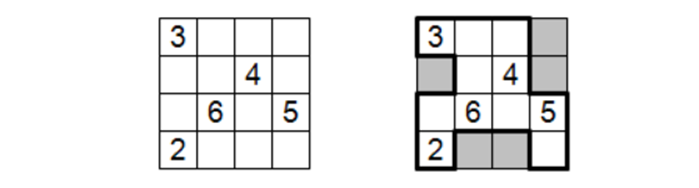

Wynik dla drugiej macierzy ( siec_small_2 ):

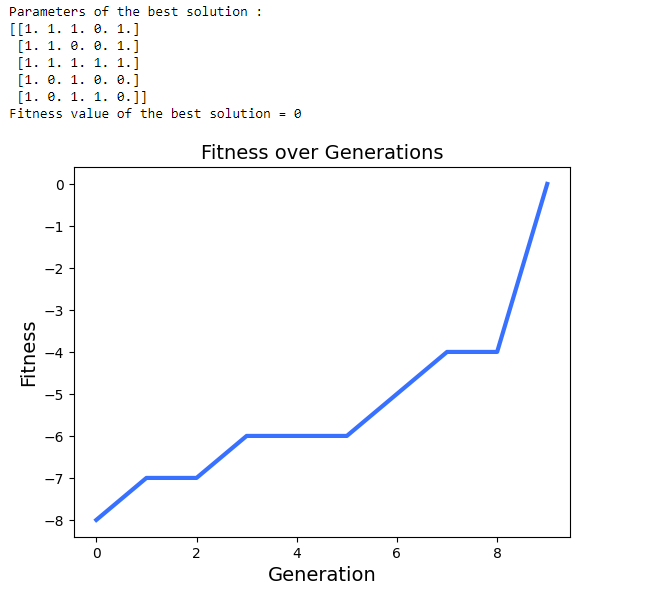

Rozwiązanie na prawdziwej siatce:

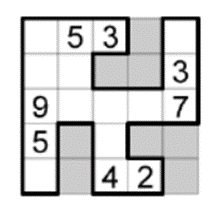

Wynik dla trzeciej macierzy ( siec_small_3 ):

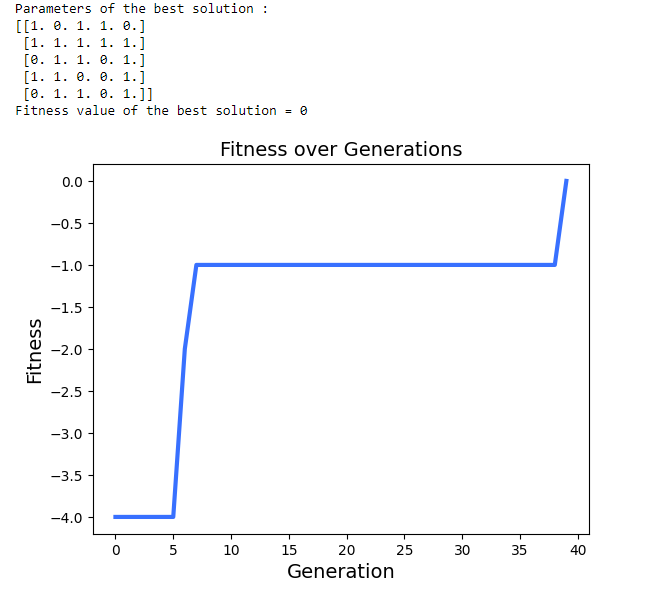

Rozwiązanie na prawdziwej siatce:

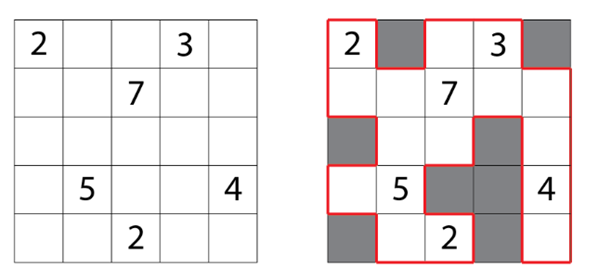

Wynik dla czwartej macierzy ( siec_small_4 ):

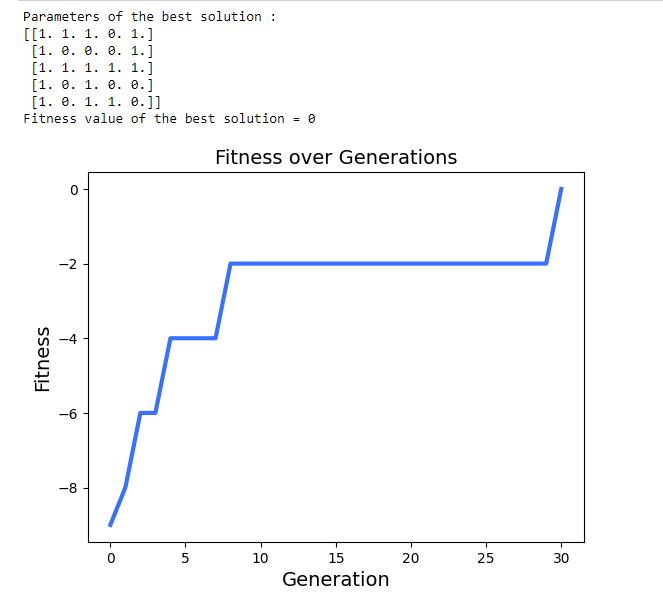

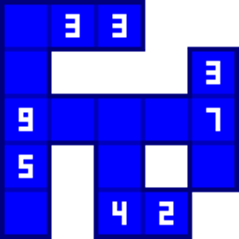

# Wniosek
Algorytm działa prawidłowo i bardzo sprawnie. Średni czas uzyskany z 100 prób jest równy około 0.095s i poprawnie rozwiązuje zadaną łamigówkę za każdym razem.

# Macierze średnie

In [ ]:
siec_mid_1 = np.array([[4, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 2, 0, 3, 0],
                        [0, 7, 0, 8, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 5]])

siec_mid_2 = np.array([[0, 2, 5, 0, 0, 0],
                         [0, 0, 0, 0, 0, 3],
                         [0, 0, 5, 0, 0, 0],
                         [0, 0, 0, 7, 0, 0],
                         [3, 0, 0, 0, 0, 0],
                         [0, 0, 0, 4, 6, 0]])

siec_mid_3 = np.array([[0,0,0,0,0,0,0],
                      [0,0,0,5,0,0,0],
                      [0,0,0,0,0,3,0],
                      [0,0,0,0,3,0,0],
                      [0,0,2,0,0,0,0],
                      [0,0,0,4,0,0,0],
                      [0,0,0,0,0,0,0]])

siec_mid_4 = np.array([[0,4,0,3,0,4,0],
                     [0,0,0,0,0,0,0],
                     [2,0,0,0,0,0,4],
                     [0,0,4,0,5,0,0],
                     [4,0,0,0,0,0,4],
                     [0,0,0,0,0,0,0],
                     [0,3,0,2,0,2,0]])

siec_mid_5 = np.array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 3],
                      [0, 9, 0, 0, 0, 0, 0, 0, 3, 0],
                      [0, 0, 9, 0, 0, 0, 0, 3, 0, 0],
                      [8, 0, 0, 0, 0, 7, 0, 0, 0, 0],
                      [0, 8, 0, 0, 0, 0, 7, 0, 0, 0],
                      [0, 0, 8, 0, 0, 0, 0, 7, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [4, 0, 0, 5, 0, 0, 0, 6, 0, 0],
                      [0, 4, 0, 0, 5, 0, 0, 0, 6, 0],
                      [0, 0, 4, 0, 0, 5, 0, 0, 0, 6]])

siec_mid_6 = np.array([[0,4,0,0,4,3,0,4,0,0],
                      [0,5,0,0,0,0,0,0,0,2],
                      [0,0,0,7,0,0,6,0,0,0],
                      [2,0,0,0,4,0,0,0,5,0],
                      [0,0,0,0,0,7,0,0,0,2],
                      [4,0,0,0,4,0,0,0,0,0],
                      [0,5,0,0,0,4,0,0,0,2],
                      [0,0,0,6,0,0,8,0,0,0],
                      [5,0,0,0,0,0,0,0,6,0],
                      [0,0,6,0,6,6,0,0,4,0]])

In [1]:
# Dodajemy pare nowych funkcji pomocniczych aby usprawnić działanie algorytmu 
def find_adjacent(matrix, index):
    row, col = index
    adjacent = []
    if row > 0 and matrix[row-1][col] == 1:
        adjacent.append((row-1, col))
    if row < len(matrix)-1 and matrix[row+1][col] == 1:
        adjacent.append((row+1, col))
    if col > 0 and matrix[row][col-1] == 1:
        adjacent.append((row, col-1))
    if col < len(matrix[0])-1 and matrix[row][col+1] == 1:
        adjacent.append((row, col+1))
    return adjacent

def find_figures(matrix):
    figures = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 1:
                figure = []
                explore(i, j, matrix, figure)
                figures.append(figure)
    return figures

def explore(i, j, matrix, figure):
    if i < 0 or j < 0 or i >= len(matrix) or j >= len(matrix[0]) or matrix[i][j] == 0:
        return
    figure.append((i, j))
    matrix[i][j] = 0
    explore(i+1, j, matrix, figure)
    explore(i-1, j, matrix, figure)
    explore(i, j+1, matrix, figure)
    explore(i, j-1, matrix, figure)

def find_empty_figures(matrix):
    figures = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 0:
                figure = []
                explore_empty(i, j, matrix, figure)
                figures.append(figure)
    return figures

def explore_empty(i, j, matrix, figure):
    if i < 0 or j < 0 or i >= len(matrix) or j >= len(matrix[0]) or matrix[i][j] == 1:
        return
    figure.append((i, j))
    matrix[i][j] = 1
    explore_empty(i+1, j, matrix, figure)
    explore_empty(i-1, j, matrix, figure)
    explore_empty(i, j+1, matrix, figure)
    explore_empty(i, j-1, matrix, figure)

Funkcja fitness uległa zmianie, dodajemy warunki korzystając z funckji powyżej:

In [2]:
def fitness_func(solution, solution_idx):
    solArr = array_to_matrix(solution)
    spr = 0 
    for x in range(len(siec_mid)):
        for y in range(len(siec_mid)):
            if (solArr[x][y] == 0):
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                    if check_neighbors(solArr, x, y):
                        spr+=1
            else:
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                      if not check_ones(solArr, x, y):
                            spr+=1
            if siec_mid[x][y] != 0:
                if (solArr[x][y] == 0):
                    spr+=1
                a = siec_mid[x][y]
                b = count_orthogonal(solArr, x, y)
                spr += abs(a-b)
    new_array = [array for array in find_empty_figures(solArr) if all(index not in (0, len(solArr)) for tuple in array for index in tuple)]
    spr += len(new_array)
    spr += len(find_figures(solArr)) -1

    fitness = -spr
    return fitness

Ilość chromosomów ustawimy na 300. Rodziców do rozmnażania wyłaniamy 200. Liczba pokoleń: 600. Przebieg rozwiązania wraz z rezultatem:

Wynik dla pierwszej macierzy ( siec_mid_1 ): nie jest to nieststy idealne rozwiązanie

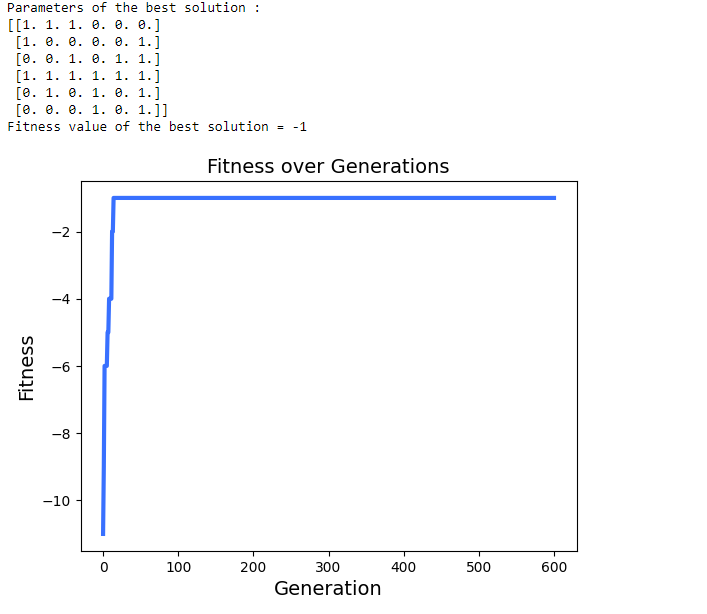

Poprawne rozwiązanie : 

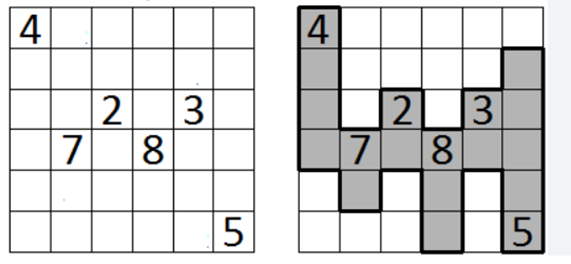

Wynik dla drugiej macierzy ( siec_mid_2 ):

Ponownie fitness wyszło -1
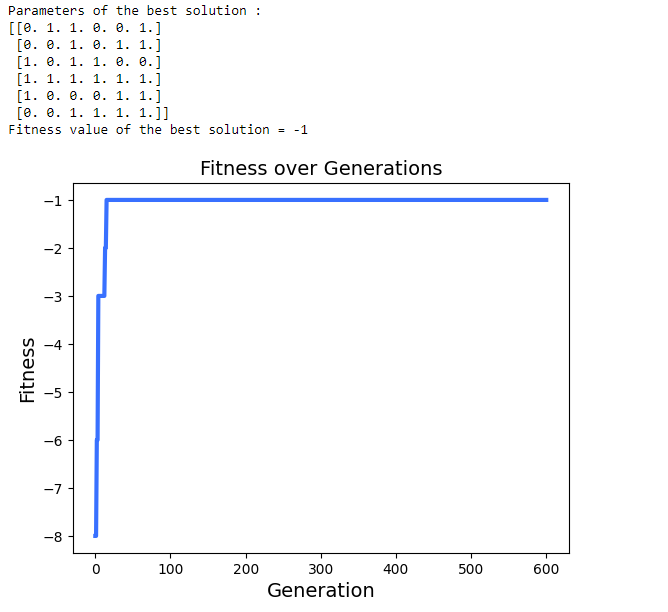

Na poniższych zdjęciach widać po lewej rozwiązanie algorytmu po prawej poprawne rozwiązanie:
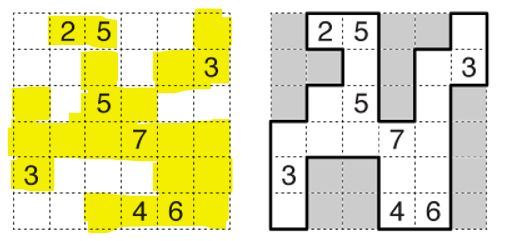    

Wynik dla trzeciej macierzy ( siec_mid_3 ):

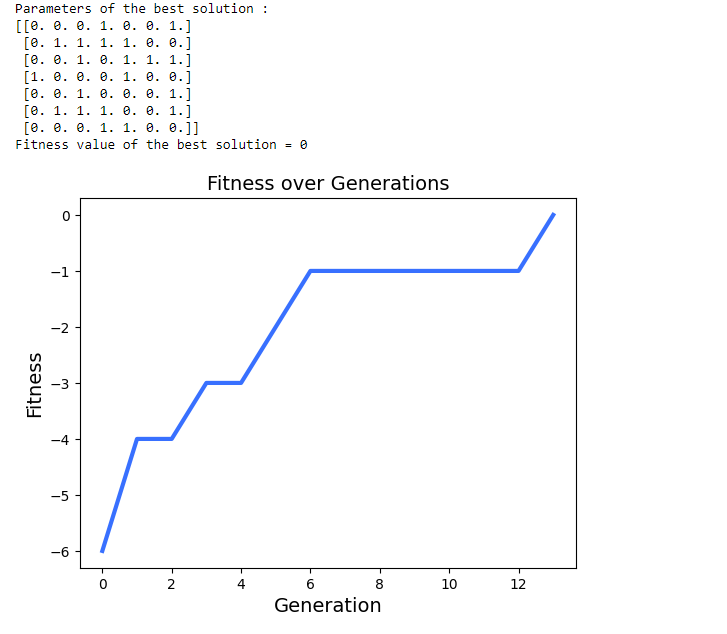

Poniżej znjadują się dwa rozwiązania po lewej rozwiązanie algorytmu mimo iż funckja fitness była = 0 to rozwiązanie jest błędne
zaś po prawej stronie przykładowe poprawne rozwiązanie:

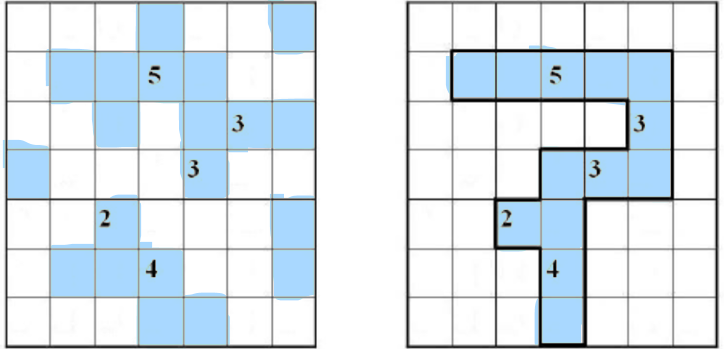

Wynik dla czwartej macierzy ( siec_mid_4 ):

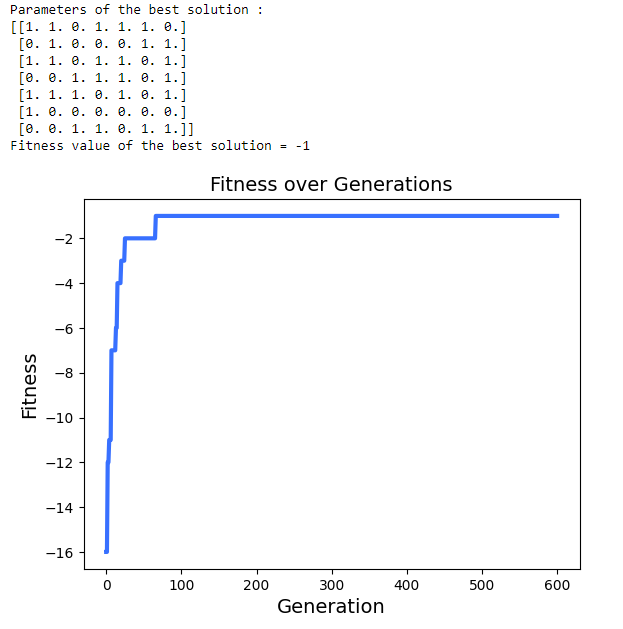

Rozwiązanie algorytmu ( po lewej ), prawidłowe ( po prawej ) - jak widać algorytm przeoczył jedną liczbę i nie zachował ciągłości pętli

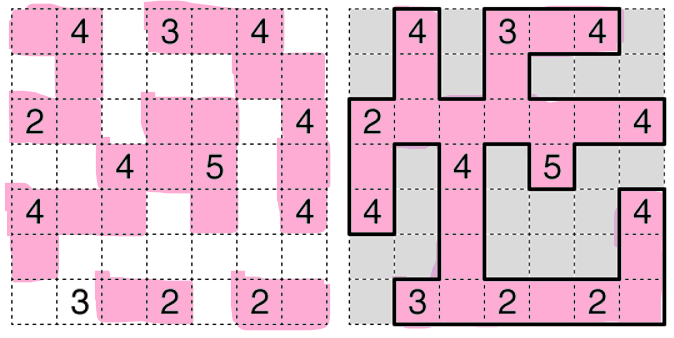

Wynik dla piątek macierzy (siec_mid_5):

Przy tak dużej macierzy ciężko jest otrzymać idealne rozwiązanie

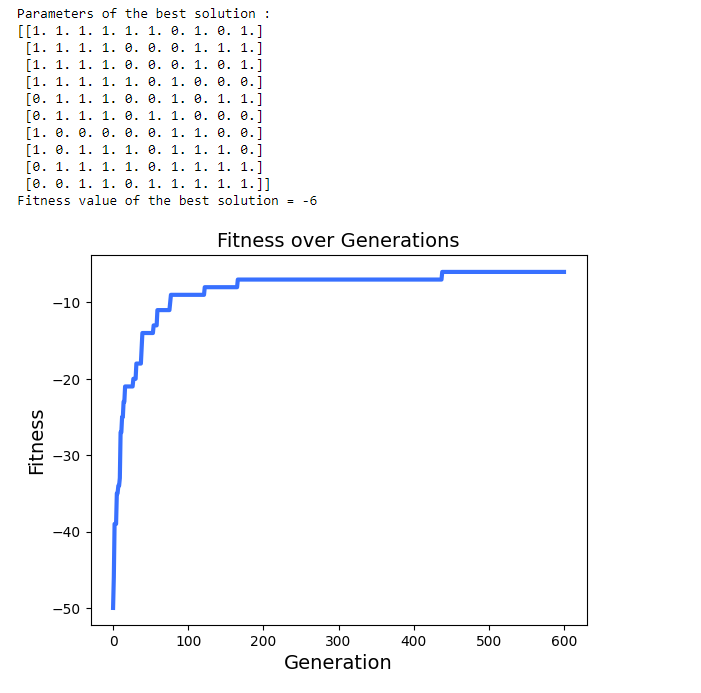

Prawidłowe rozwiązanie : 

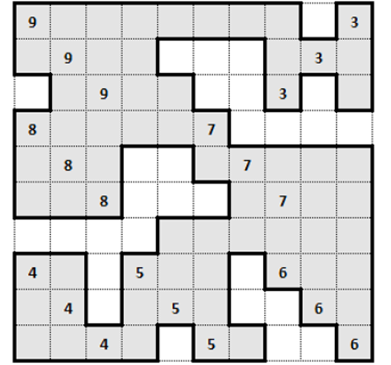

Wynik dla szóstej macierzy (siec_mid_6):

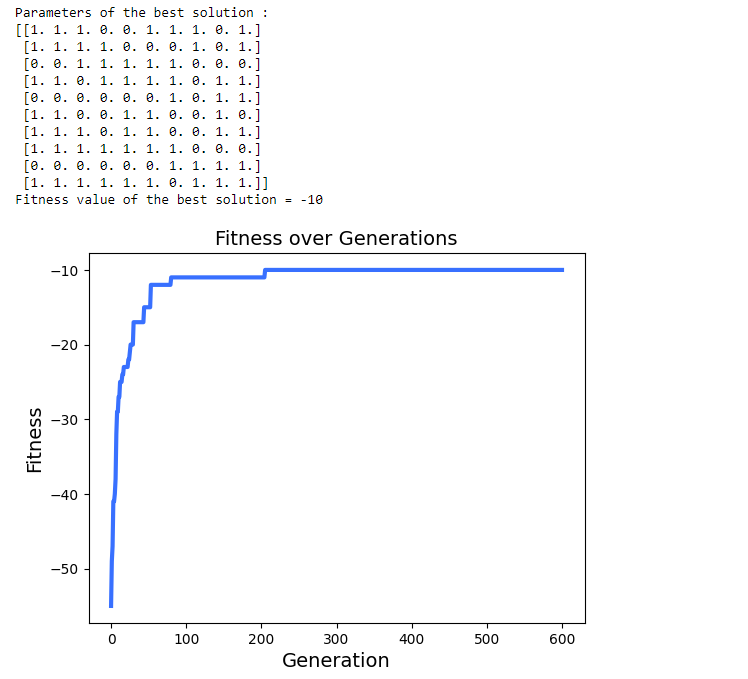

Prawidłowe rozwiązanie: 

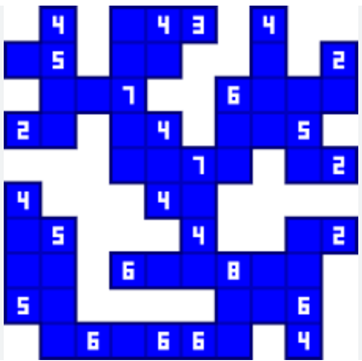

# Wniosek
Kod niestety nie rozwiązanuje wszytskich macierzy prawidłowo, wychodzą błędy takie jak pomijanie niektórych liczb czy pętla nie jest jedna tylko na przykład dwie nie połączone ze sobą.

# Macierze duże

Przy dużych macierzach nie zmieniamy funckji fitness ani nie dodajemy żadnych nowych funkcji, jedynie zmieniamy parametry funkjci pygad.GA. Ilość chromosomów ustawimy na 400. Rodziców do rozmnażania wyłaniamy 250. Liczba pokoleń: 800. 

In [6]:
siec_big_1 = np.array([[0,0,0,0,4,0,0,5,0,0],
                      [4,0,6,0,0,0,0,0,0,7],
                      [0,0,0,6,0,0,0,0,5,0],
                      [0,0,0,0,3,0,4,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0],
                      [0,0,0,10,0,7,0,0,0,0],
                      [0,7,0,0,0,0,4,0,0,0],
                      [4,0,0,0,0,0,0,2,0,4],
                      [0,0,5,0,0,3,0,0,0,0]])

siec_big_2 = np.array([[6,0,0,0,6,0,0,0,0,4],
                      [0,0,0,0,0,6,0,0,0,0],
                      [0,0,3,0,0,0,0,5,0,0],
                      [0,0,0,7,0,0,9,0,0,0],
                      [0,5,0,0,3,0,0,0,0,5],
                      [5,0,0,0,0,5,0,0,2,0],
                      [0,0,0,2,0,0,4,0,0,0],
                      [0,0,7,0,0,0,0,4,0,0],
                      [0,0,0,0,2,0,0,0,0,0],
                      [5,0,0,0,0,6,0,0,0,6]])

siec_big_3 = np.array([[6,0,0,0,7,0,5,0,0,0,5,0,0],
                      [0,0,0,4,0,0,0,0,0,0,0,8,8],
                      [6,0,0,0,0,4,0,0,8,0,0,0,0],
                      [0,4,0,0,0,0,0,0,5,0,0,0,0],
                      [0,0,0,0,4,0,0,5,0,0,0,0,0],
                      [0,0,4,0,0,2,0,0,0,9,0,6,0],
                      [6,0,0,0,0,0,0,0,0,0,0,0,5],
                      [0,5,0,2,0,0,0,9,0,0,7,0,0],
                      [0,0,0,0,0,6,0,0,7,0,0,0,0],
                      [0,0,0,0,6,0,0,0,0,0,0,7,0],
                      [0,0,0,0,3,0,0,7,0,0,0,0,5],
                      [3,3,0,0,0,0,0,0,0,7,0,0,0],
                      [0,0,6,0,0,0,6,0,4,0,0,0,5]])
 
siec_big_4 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,3,0,0,0,0,0,0,0,0,0,0,0],
                      [0,2,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,4,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,4,0,0,0,0,0,0,0,0],
                      [0,0,0,0,2,0,0,2,0,0,0,0,0,0],
                      [0,0,0,0,0,0,4,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,3,0,3,0,0,0,0],
                      [0,0,0,0,0,0,0,0,3,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,3,0,0],
                      [0,0,0,0,0,0,0,0,0,0,3,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,2,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


Wyniki pierwszej macierzy dużej ( siec_big_1 )

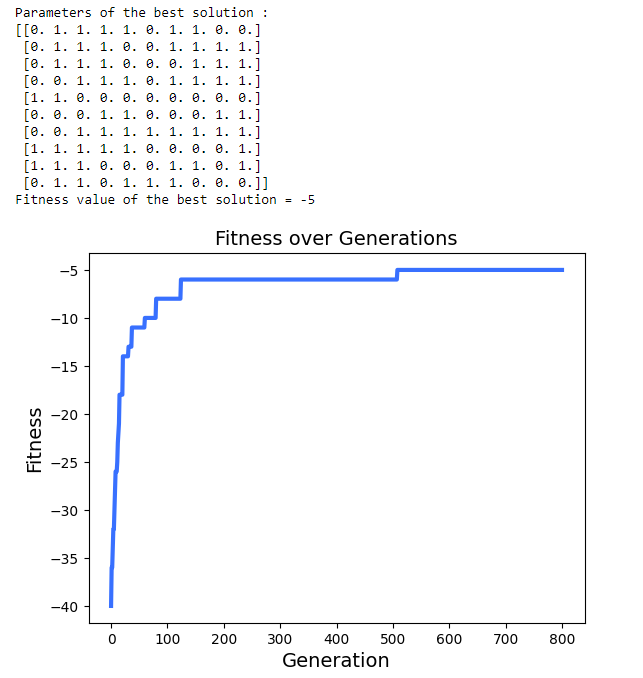

Poprawne rozwiązanie : 
    
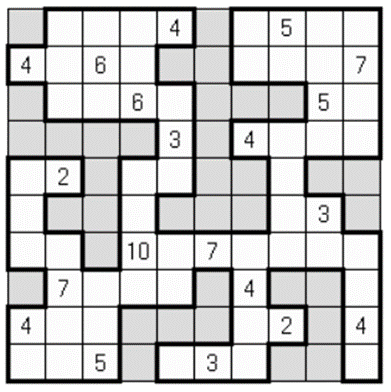    

Wynik drugiej macierzy (siec_big_2) :

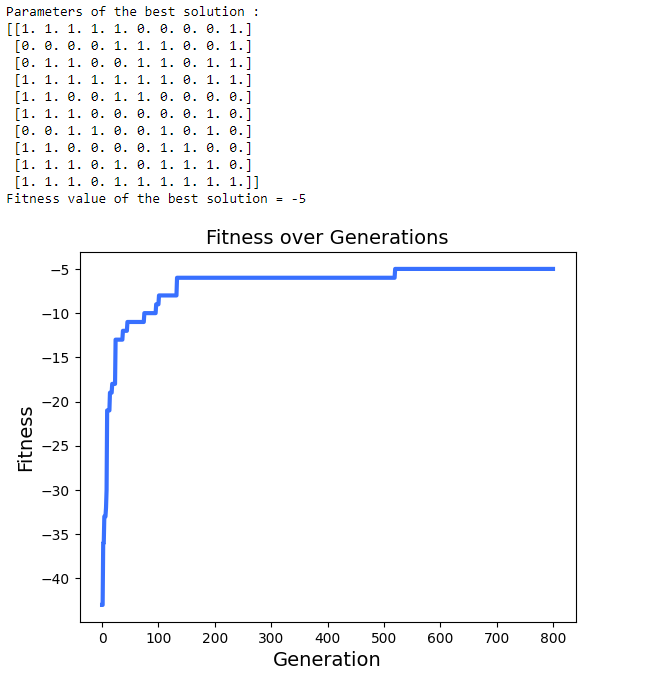

Poprawny wynik:

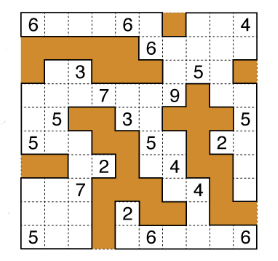

Wynik trzeciej macierzy (siec_big_3) :

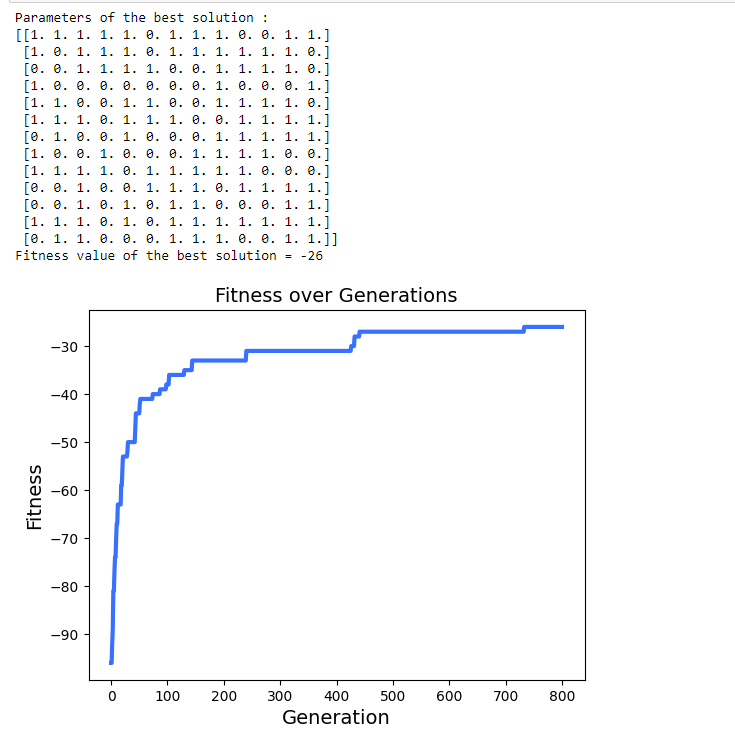

Wynik czwartej macierzy (siec_big_4) :

Pomimo, że wyszła funkcja fitness równa 0 to rozwiązanie nie jest najlepszym.

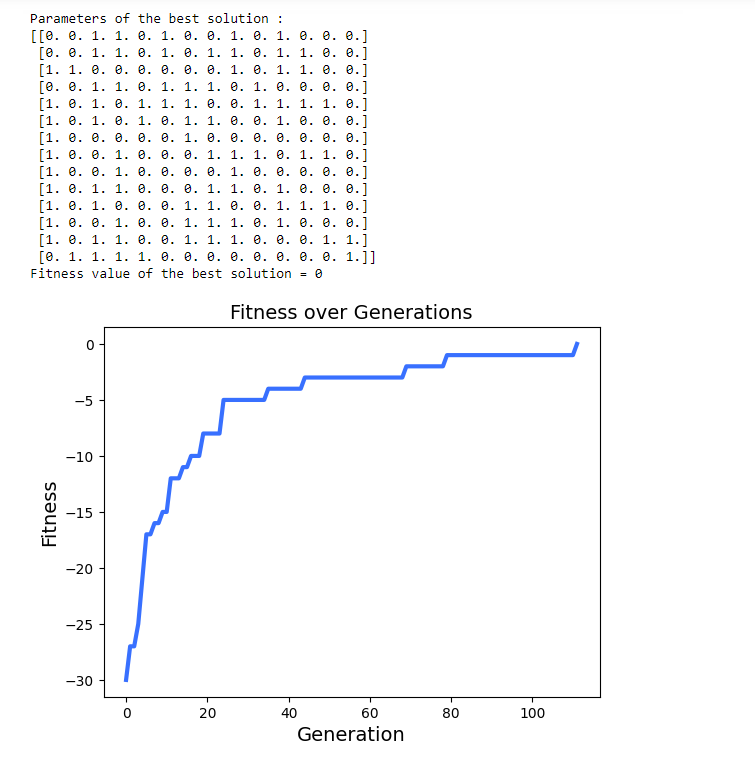

# Wniosek
Jak widzimy im większa macierz tym gorszy jest wynik funkcji fitness dla niej oraz czas działania algorytmu się wydłuża.

# Wyniki efektywności algorytmu:

W formie tabeli:
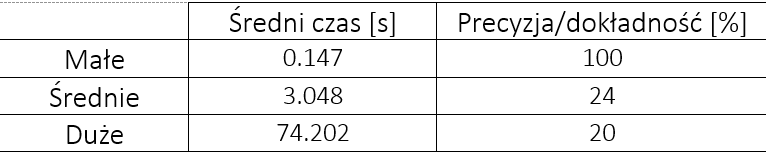

Na wykresie - Średni czas:

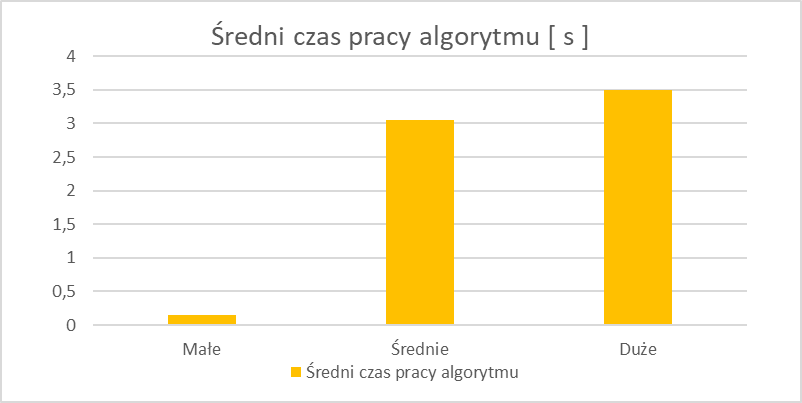

Na wykresie - Dokładność:

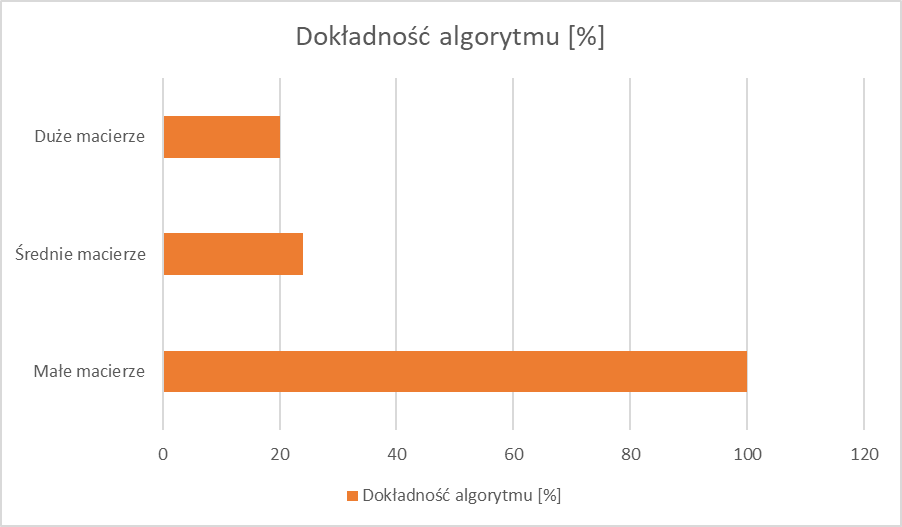

# Podsumowanie

Algorytm genetyczny radzi sobie bardzo dobrze z małymi macierzami jednak przy większych ma probelm z ich rozwiązaniem jest to spowodowane przede wszytskim złożonością tej łamigłówki i wieloma warunkami, które musi spełniać rozwiązanie aby było dobre, dlatego populacja musi być bardzo duża i ilość pokoleń jak i krzyżowań rodziców, czas pracy algorytmu także pokazuje iż znalezienie rozwiązania może nie idealnego ale bliskiego zeru zajmuje dużo czasu. Patrząc na dokładność algorytmu jednak widzimy, iż dla macierzy o wielkościach większych niż 6x6 algorytm znajduje czasem rozwiązanie może nie jest to za każdym razem jak w przypadku mniejszych macierzy ale jednak kilka razy się to zdarza. 

# Podsumowanie

Algorytm genetyczny radzi sobie bardzo dobrze z małymi macierzami jednak przy większych ma probelm z ich rozwiązaniem jest to spowodowane przede wszytskim złożonością tej łamigłówki i wieloma warunkami, które musi spełniać rozwiązanie aby było dobre, dlatego populacja musi być bardzo duża i ilość pokoleń jak i krzyżowań rodziców, czas pracy algorytmu także pokazuje iż znalezienie rozwiązania może nie idealnego ale bliskiego zeru zajmuje dużo czasu. Patrząc na dokładność algorytmu jednak widzimy, iż dla macierzy o wielkościach większych niż 6x6 algorytm znajduje rozwiązanie tylko w 20-25 przypadkach na 100.

# Bibliografia

1. https://en.wikipedia.org/wiki/Bag_(puzzle)
2. https://motris.livejournal.com/145824.html
3. https://puzzles.paramesis.com/category/puzzle/cave/
4. https://www.gmpuzzles.com/blog/2020/11/cave-by-thomas-snyder-3/
5. https://www.gmpuzzles.com/blog/2020/11/11570/
6. http://bgv.atspace.com/articles/corral/index.html
7. https://erich-friedman.github.io/papers/corral.pdf
8. https://www.gmpuzzles.com/blog/cave-rules-and-info/